In [117]:
import pandas as pd

# Archive
data = pd.read_csv("regression_data.csv")
data2 = pd.read_csv("rainfall.csv")
data.head()

data2.head()

new1 = [None]*len(data)
new2 = [None]*len(data)
new3 = [None]*len(data)

for i in range(0, len(data)):
    for j in range(0, len(data2)):
        if data['latitude_kb'][i] == data2['latitude'][j] and data['longitude_kb'][i] == data2['longitude'][j]:
            new1[i] = data2['nilai_hujan_max'][j]
            new2[i] = data2['tempoh_hujan'][j]
            new3[i] = data2['tempoh_ulang'][j]

df = pd.DataFrame({'nilai_hujan_max': new1, 'tempoh_hujan': new2, 'tempoh_ulang': new3})

df['kedalaman_banjir'] = data['kedalaman_banjir']
df['distance'] = data['distance']

df.head()
df.to_csv('flood_risk.csv', index=False)

In [118]:
df = pd.read_csv('flood_risk.csv')
df.head()

nilai_hujan_max  tempoh_hujan tempoh_ulang  kedalaman_banjir     distance
0            111.0           2.0           34               0.6  4245.737601
1             18.0           1.0            2               0.2  4532.533863
2             18.0           1.0            2               0.2  5266.664356
3            111.0           2.0           34               0.6  8652.136771
4             18.0           1.0            2               0.2  3753.265280

In [119]:
df['numeric_checker'] = df['tempoh_ulang'].str.isnumeric()
df.head()

nilai_hujan_max  tempoh_hujan tempoh_ulang  kedalaman_banjir     distance  \
0            111.0           2.0           34               0.6  4245.737601   
1             18.0           1.0            2               0.2  4532.533863   
2             18.0           1.0            2               0.2  5266.664356   
3            111.0           2.0           34               0.6  8652.136771   
4             18.0           1.0            2               0.2  3753.265280   

   numeric_checker  
0             True  
1             True  
2             True  
3             True  
4             True

In [120]:
for i in range(0, len(df)):
    if df['numeric_checker'][i] == True:
        df['kedalaman_banjir'][i] = abs(df['kedalaman_banjir'][i])
        pass
    else:
        df['tempoh_ulang'][i] = 2

C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_15660\2809725313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kedalaman_banjir'][i] = abs(df['kedalaman_banjir'][i])
C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_15660\2809725313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kedalaman_banjir'][i] = abs(df['kedalaman_banjir'][i])
C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_15660\2809725313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [121]:
df['tempoh_hujan'] = df['tempoh_hujan'].astype('int64')
df['tempoh_ulang'] = df['tempoh_ulang'].astype('int64')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19824 entries, 0 to 19823
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nilai_hujan_max   19824 non-null  float64
 1   tempoh_hujan      19824 non-null  int64  
 2   tempoh_ulang      19824 non-null  int64  
 3   kedalaman_banjir  19824 non-null  float64
 4   distance          19824 non-null  float64
 5   numeric_checker   19824 non-null  bool   
dtypes: bool(1), float64(3), int64(2)
memory usage: 793.9 KB


In [123]:
df.describe()

nilai_hujan_max  tempoh_hujan  tempoh_ulang  kedalaman_banjir  \
count     19824.000000  19824.000000  19824.000000      19824.000000   
mean        101.770031     10.655014     24.961511          0.578694   
std          75.885400     22.746204    101.408058          0.530629   
min           0.000000      0.000000      2.000000          0.000000   
25%          55.000000      2.000000      2.000000          0.300000   
50%          82.000000      3.000000      2.000000          0.450000   
75%         117.000000      6.000000     12.000000          0.600000   
max         570.000000    288.000000   1135.000000          6.000000   

           distance  
count  19824.000000  
mean    4071.710091  
std     4790.504712  
min       19.253343  
25%     1313.426109  
50%     2683.402344  
75%     4827.023973  
max    66853.687820

In [124]:
df2 = pd.read_csv('regression_data.csv')
df['town_distance'] = df2['town_distance']
df['land_cover'] = df2['land_cover']

# Calculate the flood hazard
Reference: Development of flood risk vulnerability index for critical infrastructure in malaysai

- Low 0 - 0.5
- Moderate 0.5 - 1.2
- High: 1.2 - 2.5 (due to nature of our data, we will assume > 1.2 as high )

In [125]:
new = [None]*len(df)

for i in range(0, len(df)):
    if (df['kedalaman_banjir'][i] >= 0 and df['kedalaman_banjir'][i] < 0.5):
        new[i] =  "Low"
    elif (df['kedalaman_banjir'][i] >= 0.5 and df['kedalaman_banjir'][i] < 1.2):
        new[i] =  "Medium"
    else:
        new[i] =  "High"

In [126]:
df.loc[:,'flood_hazard'] = new
print(df.head())
print(df.tail())

   nilai_hujan_max  tempoh_hujan  tempoh_ulang  kedalaman_banjir     distance  \
0            111.0             2            34               0.6  4245.737601   
1             18.0             1             2               0.2  4532.533863   
2             18.0             1             2               0.2  5266.664356   
3            111.0             2            34               0.6  8652.136771   
4             18.0             1             2               0.2  3753.265280   

   numeric_checker  town_distance  land_cover flood_hazard  
0             True   11394.621769         200       Medium  
1             True    8220.642421          40          Low  
2             True    9033.156201          40          Low  
3             True   18796.430267         126       Medium  
4             True    6279.729808          40          Low  
       nilai_hujan_max  tempoh_hujan  tempoh_ulang  kedalaman_banjir  \
19819             68.5             3             2              0.15   
198

In [127]:
df['flood_hazard'].value_counts()

flood_hazard
Low       10244
Medium     8224
High       1356
Name: count, dtype: int64

In [128]:
df.describe()

nilai_hujan_max  tempoh_hujan  tempoh_ulang  kedalaman_banjir  \
count     19824.000000  19824.000000  19824.000000      19824.000000   
mean        101.770031     10.655014     24.961511          0.578694   
std          75.885400     22.746204    101.408058          0.530629   
min           0.000000      0.000000      2.000000          0.000000   
25%          55.000000      2.000000      2.000000          0.300000   
50%          82.000000      3.000000      2.000000          0.450000   
75%         117.000000      6.000000     12.000000          0.600000   
max         570.000000    288.000000   1135.000000          6.000000   

           distance  town_distance    land_cover  
count  19824.000000   19824.000000  19824.000000  
mean    4071.710091   16447.459433     91.874344  
std     4790.504712   18087.364621     52.596663  
min       19.253343     181.210220     20.000000  
25%     1313.426109    5802.998856     50.000000  
50%     2683.402344   10951.282859     50.000000  
75%     4827.023973   18798.056593    112.000000  
max    66853.687820  133517.266498    200.000000

<Axes: xlabel='flood_hazard', ylabel='count'>

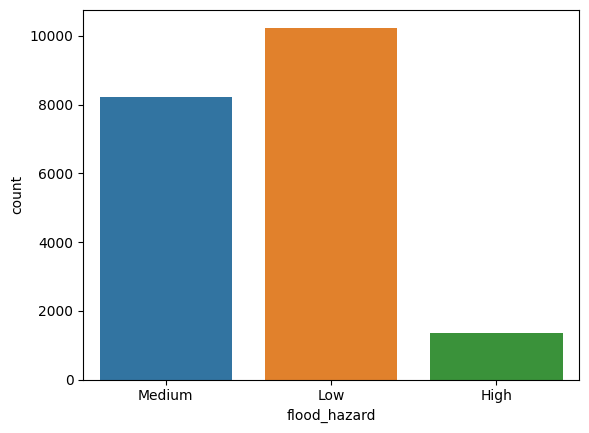

In [129]:
import seaborn as sns
sns.countplot(x='flood_hazard', data=df)

<Axes: xlabel='kedalaman_banjir', ylabel='Count'>

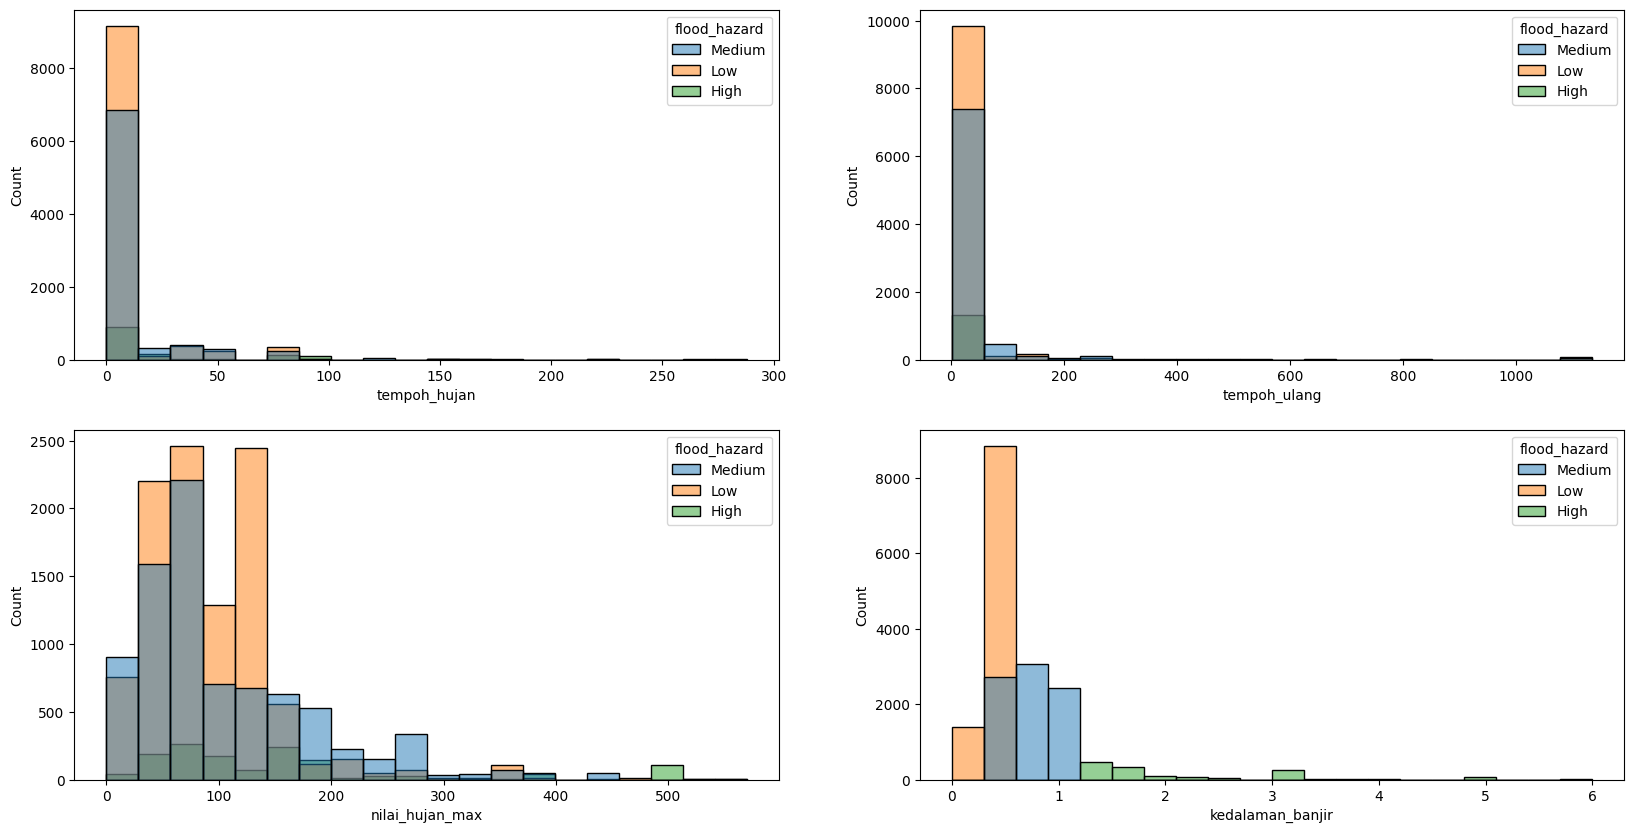

In [130]:
# we will use subplot and histogram to visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x="tempoh_hujan", hue="flood_hazard", bins = 20)

plt.subplot(2, 2, 2)
sns.histplot(data=df, x="tempoh_ulang", hue="flood_hazard",bins = 20)

plt.subplot(2, 2, 3)
sns.histplot(x = 'nilai_hujan_max', hue = 'flood_hazard', data = df, bins = 20)

plt.subplot(2, 2, 4)
sns.histplot(df, x="kedalaman_banjir", hue="flood_hazard", bins = 20)

<Axes: xlabel='tempoh_ulang', ylabel='nilai_hujan_max'>

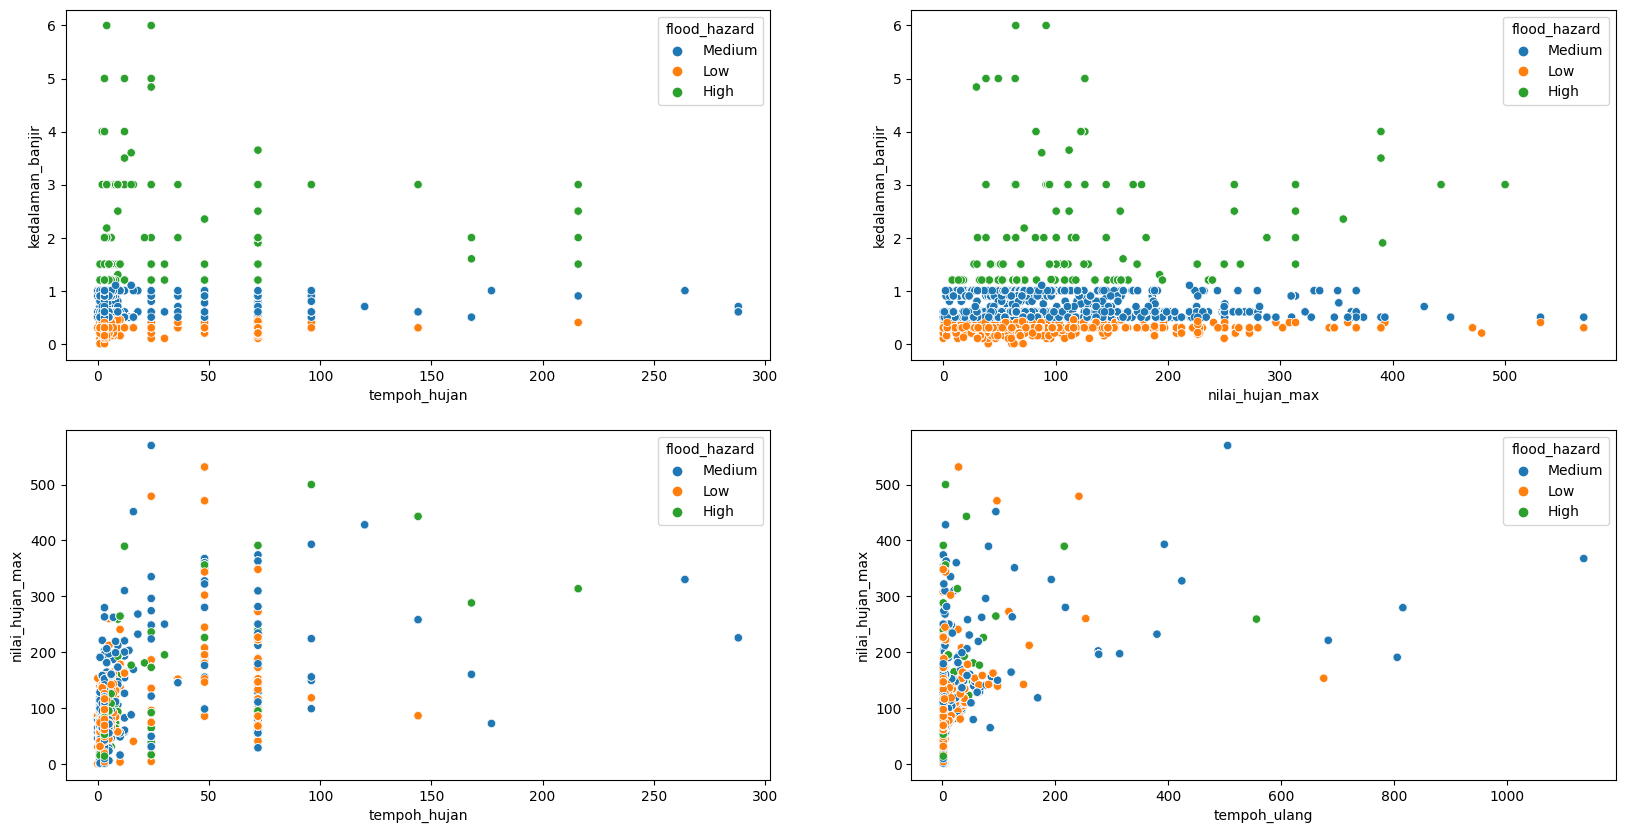

In [131]:
# let's use scatter plot to see some relationship between the variables

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x="tempoh_hujan", y="kedalaman_banjir", hue="flood_hazard")

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x="nilai_hujan_max", y="kedalaman_banjir", hue="flood_hazard")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x="tempoh_hujan", y="nilai_hujan_max", hue="flood_hazard")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x="tempoh_ulang", y="nilai_hujan_max", hue="flood_hazard")

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


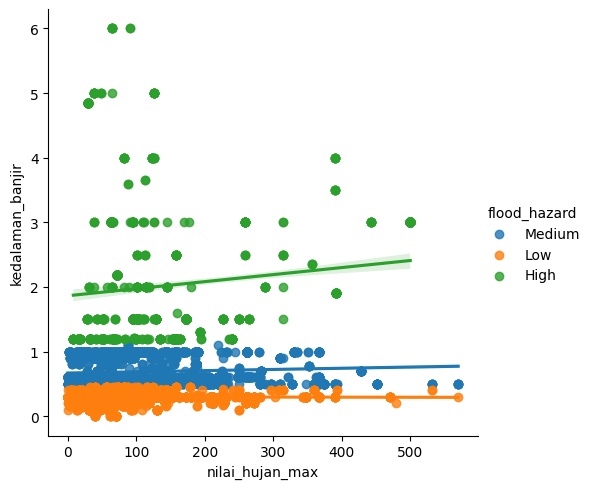

In [132]:
# seems like nilai_hujan_max and kedalamanhujan has a linear relationship

sns.lmplot(x = 'nilai_hujan_max', y = 'kedalaman_banjir', data = df, hue = 'flood_hazard')

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


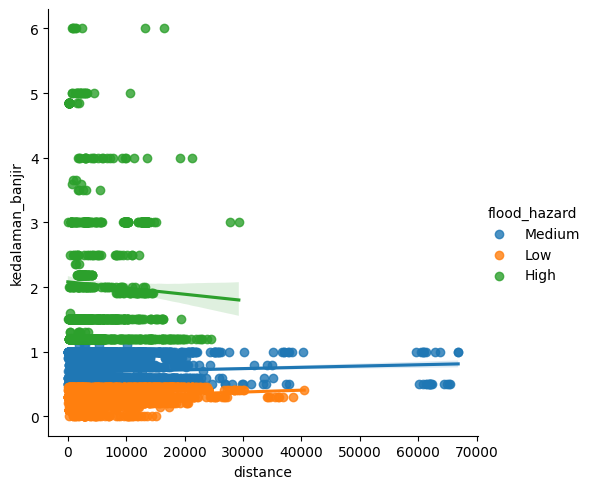

In [133]:
sns.lmplot(data = df, x = 'distance', y = 'kedalaman_banjir', hue = 'flood_hazard')

# Damage Computation
- We do not know the location whether it is in a city or not in a city
- Land coverage only let us know the land use, but not specifically how the land is used (housing, industrial, institutional)
- We will assume all the location to be the same under the class of residential household

Using the data from Condition of Flooding and Flood Damage Assessment, JPS (2012) for residential household, 
- mean damange = 3274
- mean stata value = 0.25 (urban = 1 and rural = 0)
- mean depth = 0.93
- mean duration = 2.83

Total damage factor = 0.32 * (depth - mean_depth) +
                0.08 * (duration - mean_duration) +
                0.33 * (strata - mean_strata) +
                1

In [134]:
# get the strata
# we will assume that the strata to be 1 if the town distance is less than the town distance column mean (about 10 km)

new = [None]*len(df)

for i in range(0, len(df)):
    if (df['town_distance'][i] < df['town_distance'].mean()):
        new[i] = 1
    else:
        new[i] = 0

df['strata'] = new
df.head()

nilai_hujan_max  tempoh_hujan  tempoh_ulang  kedalaman_banjir     distance  \
0            111.0             2            34               0.6  4245.737601   
1             18.0             1             2               0.2  4532.533863   
2             18.0             1             2               0.2  5266.664356   
3            111.0             2            34               0.6  8652.136771   
4             18.0             1             2               0.2  3753.265280   

   numeric_checker  town_distance  land_cover flood_hazard  strata  
0             True   11394.621769         200       Medium       1  
1             True    8220.642421          40          Low       1  
2             True    9033.156201          40          Low       1  
3             True   18796.430267         126       Medium       0  
4             True    6279.729808          40          Low       1

In [135]:
# Computing the damage
# assume all locations are in fact residential areas

new = [None]*len(df)

# define variables
mean_depth = 0.93
mean_duration = 2.83
mean_strata = 0.25

# we have to compute for each unit, we need to find how many houses in a taman of the size that we defined (about 15 hectares)
# assume for one housing unit, it is about 1 hectare, so we assume there are 15 houses in a taman

for i in range(0, len(df)):
    new[i] = 0.32 * (df['kedalaman_banjir'][i] - mean_depth) + 0.08 * (df['tempoh_hujan'][i] - mean_duration) + 0.33 * (df['strata'][i] - mean_strata) + 1 
    for j in range(0,14):
        new[i] = new[i] + 0.32 * (df['kedalaman_banjir'][i] - mean_depth) + 0.08 * (df['tempoh_hujan'][i] - mean_duration) + 0.33 * (df['strata'][i] - mean_strata) + 1 
    
df['damage_factor'] = new
df.head()

nilai_hujan_max  tempoh_hujan  tempoh_ulang  kedalaman_banjir     distance  \
0            111.0             2            34               0.6  4245.737601   
1             18.0             1             2               0.2  4532.533863   
2             18.0             1             2               0.2  5266.664356   
3            111.0             2            34               0.6  8652.136771   
4             18.0             1             2               0.2  3753.265280   

   numeric_checker  town_distance  land_cover flood_hazard  strata  \
0             True   11394.621769         200       Medium       1   
1             True    8220.642421          40          Low       1   
2             True    9033.156201          40          Low       1   
3             True   18796.430267         126       Medium       0   
4             True    6279.729808          40          Low       1   

   damage_factor  
0        16.1325  
1        13.0125  
2        13.0125  
3        11.1825  
4        13.0125

<Axes: xlabel='damage_factor', ylabel='Density'>

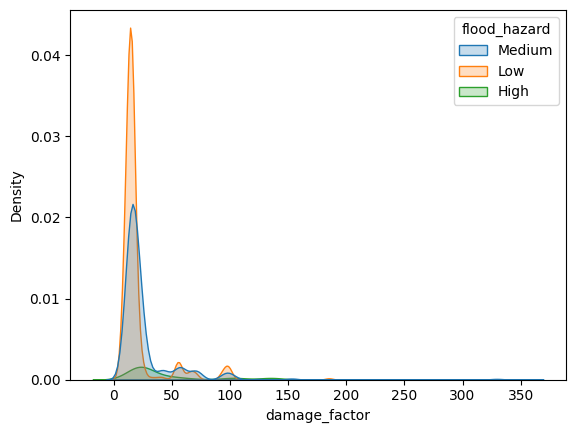

In [136]:
sns.kdeplot(data=df, x="damage_factor", hue="flood_hazard", fill = True)

# Flood risk computation
We are using the formula proposed by (Sabri, Ratnarajah, Adnan, Wan Hazdy Azad, & Mohd Fisham, 2018) which the paper could not be found 🤔
The formula is as follows: `R = sum( 1/i*D)` where

- `R` is the flood risk
- `i` is the ARI
- `D` is the damage factor for each ARI

Procedure:
1. Find the damage factor for each ARI
2. Multiply the damage factor to the inverse of ARI for each ARI

Pixels assumption:
1. 100m x 100m or 1 hectare per pixel
2. Assume for each location is the center of a square of length 1500m x 1500m that gives us 225 pixels
3. We will perform 25 iterative sum for the term `1/i*D`

_________________
|               |
|               |
|        *      |
|               |
|_______________|

In [137]:
new = [None]*len(df)

for i in range(0, len(df)):
    new[i] = 1/df['tempoh_ulang'][i]*df['damage_factor'][i]
    for j in range(0,224):
        new[i] = new[i] + 1/df['tempoh_ulang'][i]*df['damage_factor'][i]
        
df['flood_risk'] = new

<Axes: xlabel='flood_risk', ylabel='Density'>

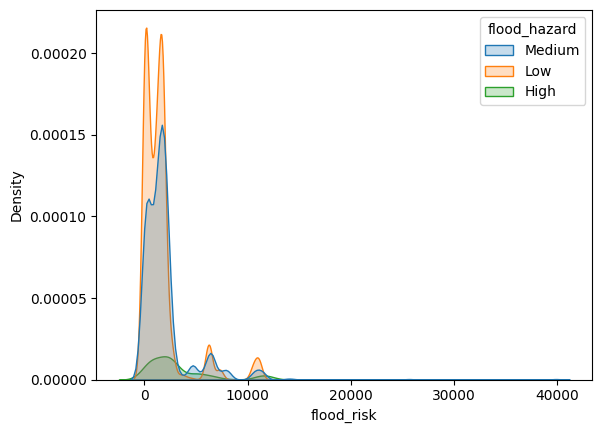

In [138]:
sns.kdeplot(data=df, x="flood_risk", hue="flood_hazard", fill = True)

In [139]:
df['flood_risk'].describe()

count    19824.000000
mean      1837.133526
std       2487.929726
min          3.326786
25%        334.757813
50%       1393.031250
75%       1895.906250
max      39922.031250
Name: flood_risk, dtype: float64

In [140]:
# now we want to group the flood risk into classed
new = [None]*len(df)

for i in range(0, len(df)):
    if df['flood_risk'][i] <= 50:
        new[i] = 'Very Low'
    elif df['flood_risk'][i] > 50 and df['flood_risk'][i] <= 1000:
        new[i] = 'Low'
    elif df['flood_risk'][i] > 1000 and df['flood_risk'][i] <= 5000:
        new[i] = 'Medium'
    elif df['flood_risk'][i] > 5000 and df['flood_risk'][i] <= 25000:
        new[i] = 'High'
    else:
        new[i] = 'Very High'
        
df['flood_risk_class'] = new

flood_risk_class
Medium       10292
Low           6908
High          1828
Very Low       782
Very High       14
Name: count, dtype: int64

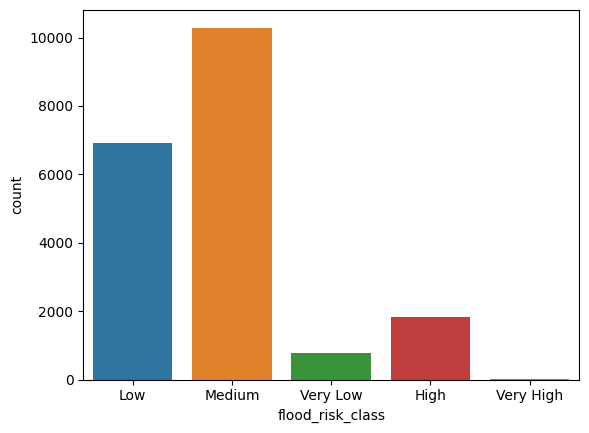

In [141]:
sns.countplot(x='flood_risk_class', data=df)
df['flood_risk_class'].value_counts()

# Filter by land type
Since we have the land cover or land type from the satellite, let's perform some filtering

In [142]:
df = df[df['land_cover'] == 50]

In [143]:
df['flood_risk_class'].value_counts()

flood_risk_class
Low          3657
Medium       3524
High          756
Very Low      302
Very High       1
Name: count, dtype: int64

<Axes: xlabel='flood_risk_class', ylabel='count'>

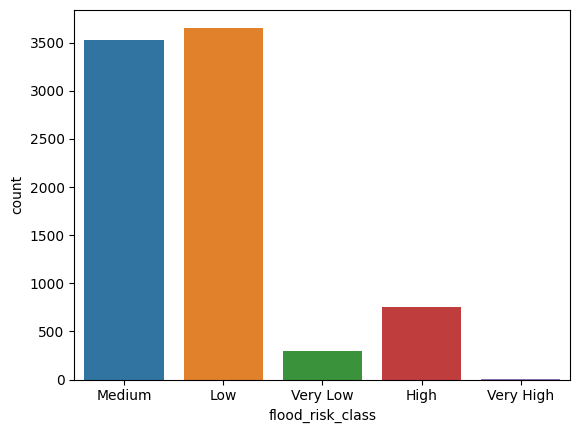

In [144]:
sns.countplot(x='flood_risk_class', data=df)